## Importing libs and reading a dataset

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
df = pd.read_csv("C:/Users/User/Downloads/seoul+bike+sharing+demand/SeoulBikeData.csv", encoding = "cp1251")

## One-hot encoding for targets and dropping some extra columns

In [20]:
df["Functioning Day"] = (df["Functioning Day"] == 1).astype(int)

In [21]:
df = df[df["Hour"] == 12]

In [22]:
df = df.drop(["Hour"], axis=1)

In [23]:
df = df.drop(["Date", "Seasons", "Holiday"], axis=1)

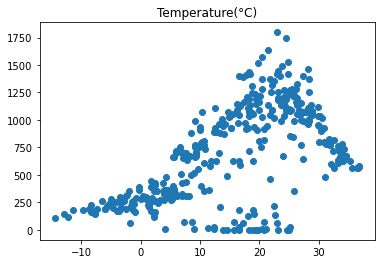

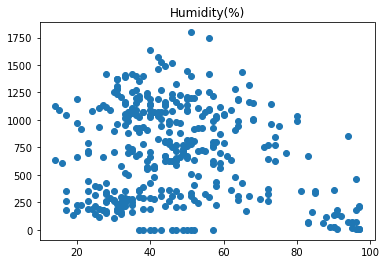

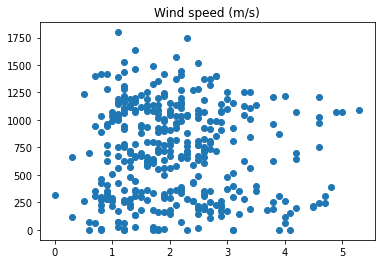

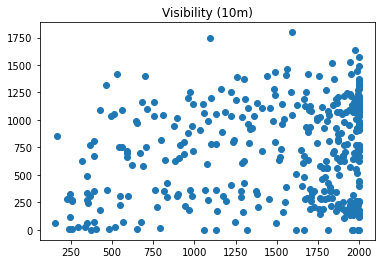

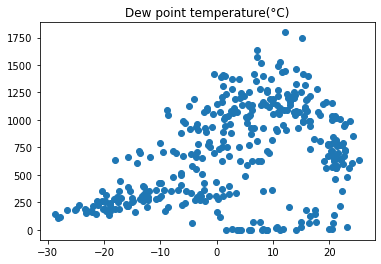

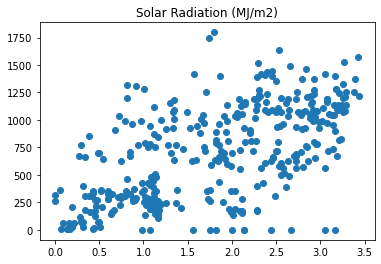

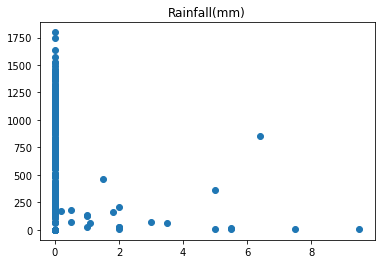

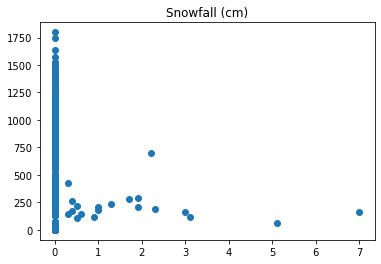

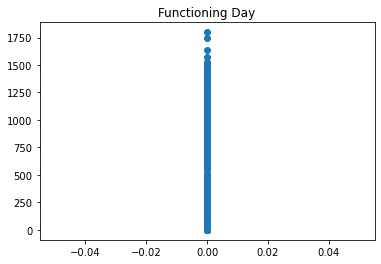

In [24]:
for label in df.columns[1:]:
    plt.scatter(df[label], df["Rented Bike Count"])
    plt.title(label)
    plt.show()

In [25]:
df = df.drop(['Wind speed (m/s)', 'Functioning Day', 'Visibility (10m)'], axis=1)

## Normilizing data for features

In [29]:
X_Data = df[df.columns[1:]]
Y_Data = df["Rented Bike Count"]

In [31]:
X_Data = X_Data.apply(lambda x: (x) / (x.max(axis=0)))

In [32]:
df = pd.concat([X_Data, Y_Data], axis=1)

In [72]:
df.head()

,Temperature(°C),Humidity(%),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
12,0.046196,0.237113,-0.679842,0.322674,0.0,0.0,449
36,0.116848,0.422680,-0.308300,0.316860,0.0,0.0,479
60,0.157609,0.876289,0.134387,0.125000,0.0,0.0,333
84,-0.008152,0.391753,-0.509881,0.322674,0.0,0.0,393
108,-0.062500,0.257732,-0.778656,0.000000,0.0,0.0,321


## Doing a train-test split

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[:-1]], df[df.columns[-1:]], test_size=0.2)

## Creating and training the multiple linear regression model

In [85]:
clf = LinearRegression()
clf.fit(X_train, Y_train)

LinearRegression()

In [98]:
clf.score(X_test, Y_test)

0.5108558490178545

## Scatter and plot for a specific feature (temperature)

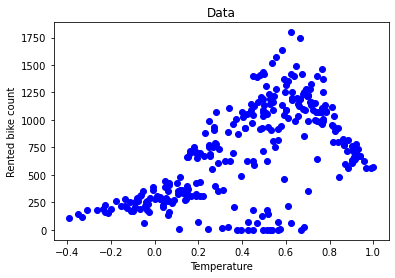

In [100]:
plt.scatter(X_train[["Temperature(°C)"]], Y_train, color="Blue")
plt.title("Data")
plt.xlabel("Temperature")
plt.ylabel("Rented bike count")
plt.show()